In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('data/multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [3]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


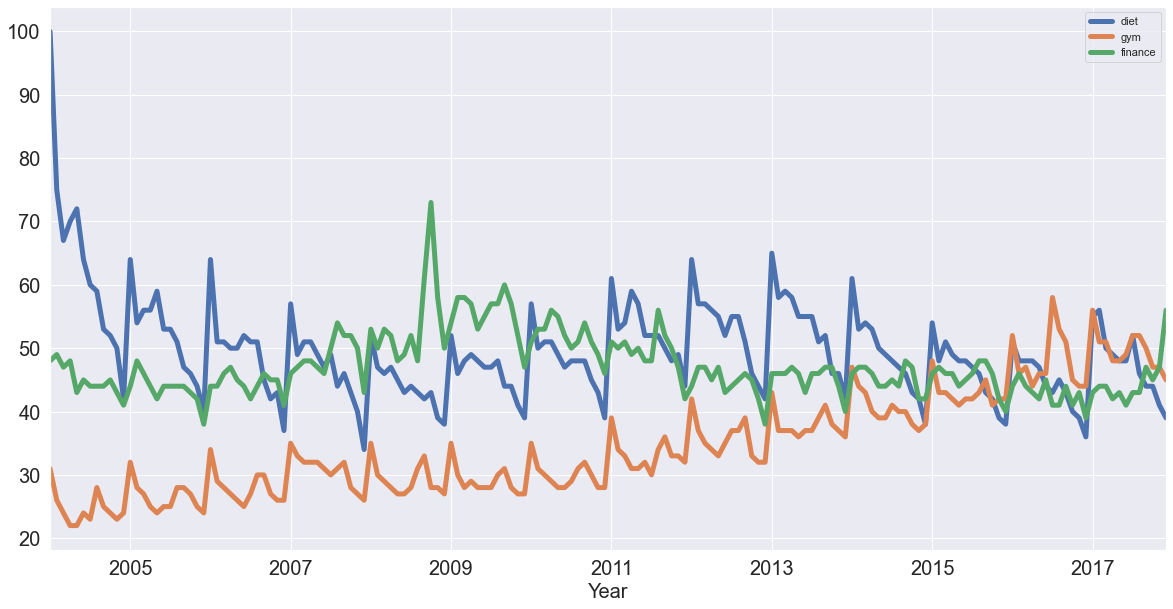

In [5]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

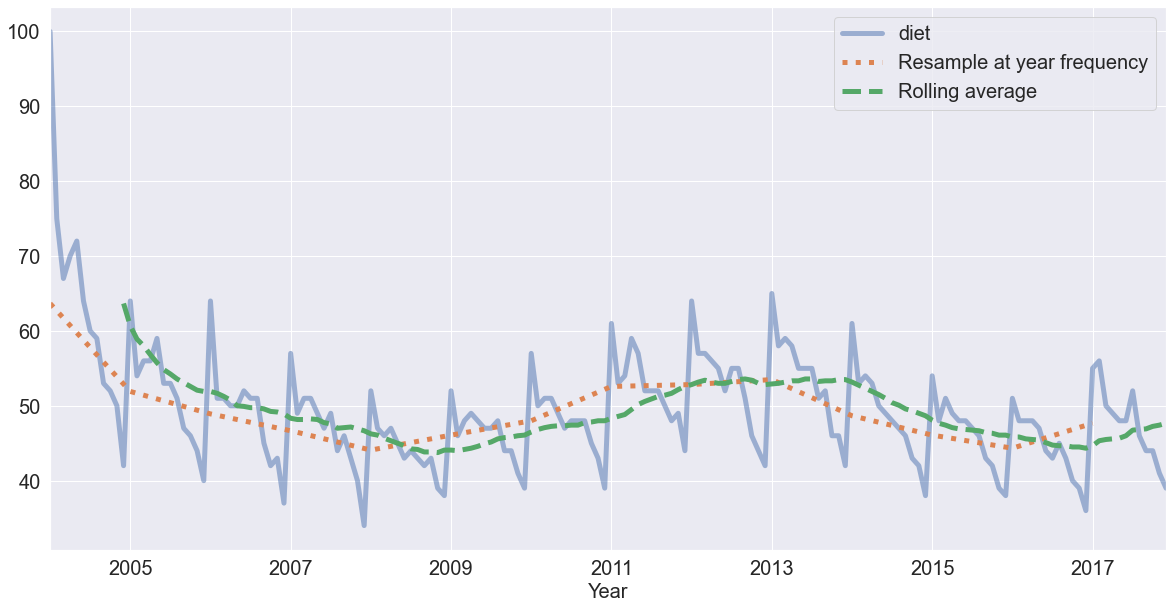

In [15]:
diet = df['diet']
diet_resample = diet.resample('A').mean()
diet_rolling = diet.rolling(12).mean()

ax = diet.plot(figsize=(20,10), linewidth=5, fontsize=20, alpha=0.5, style='-')
diet_resample.plot(style=':', linewidth=5, label='Resample at year frequency', ax=ax)
diet_rolling.plot(style='--', linewidth=5, label='Rolling average', ax=ax)
ax.legend(fontsize=20)
# diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
# diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

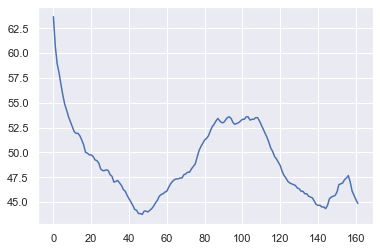

In [24]:
x = np.asarray(df[['diet']])
win_size = 12
win_half = int(win_size / 2)
diet_smooth = np.array([x[(idx-win_half):(idx+win_half)].mean() for idx in np.arange(win_half, len(x))])
plt.plot(diet_smooth)

Text(0.5, 0, 'Year')

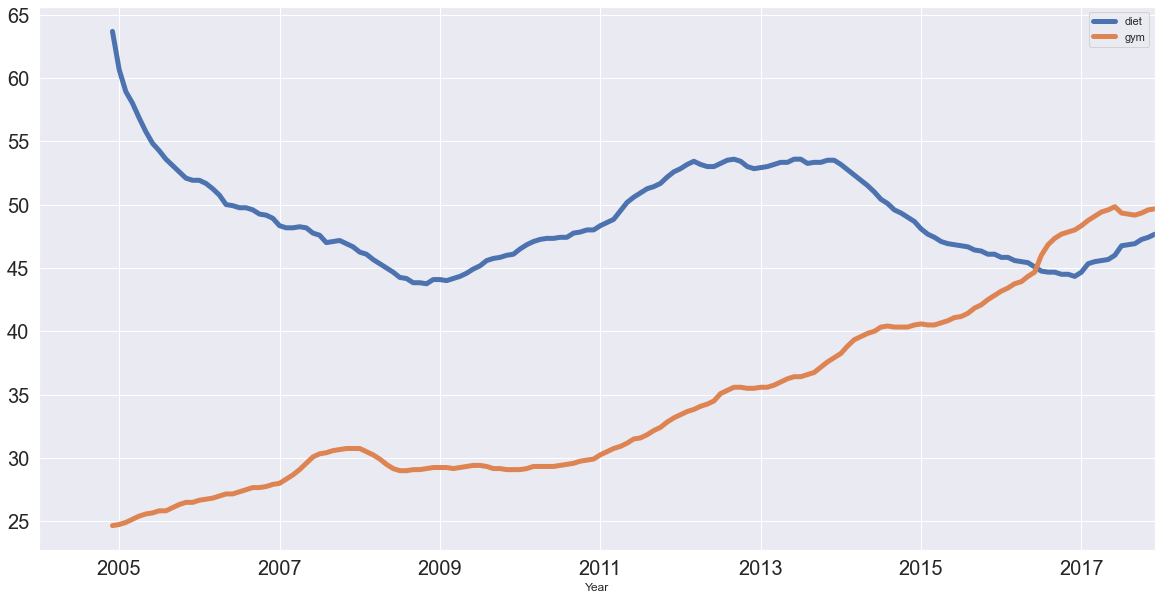

In [17]:
gym = df['gym']
df_average = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_average.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')

Text(0.5, 0, 'Year')

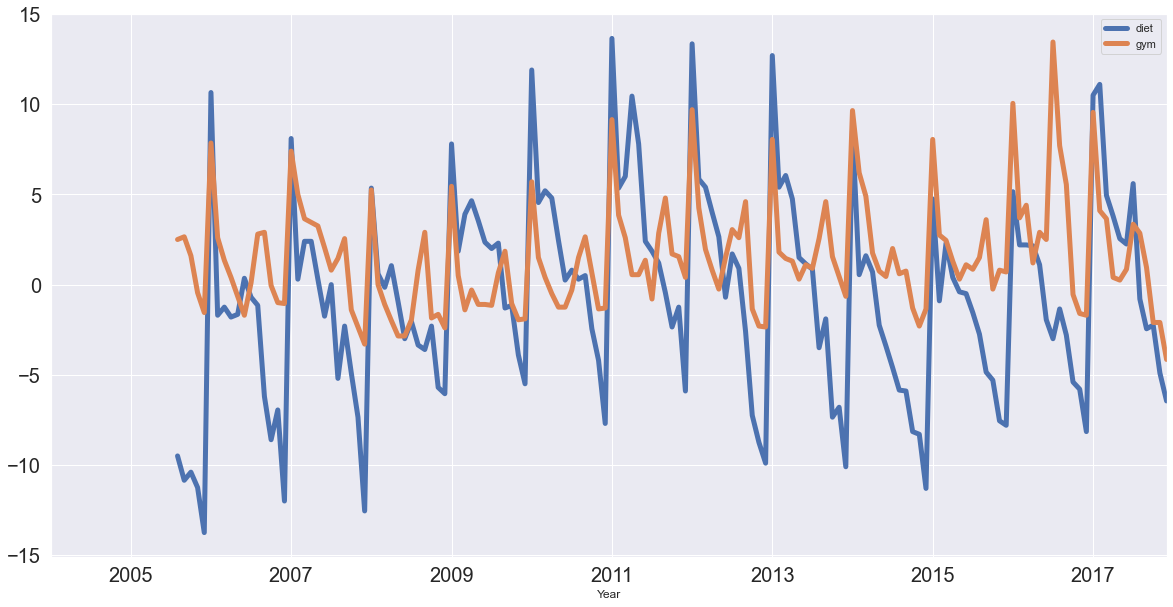

In [62]:
df_diff_trend = df[['diet', 'gym']] - df_average
df_diff_trend.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')

Text(0.5, 0, 'Year')

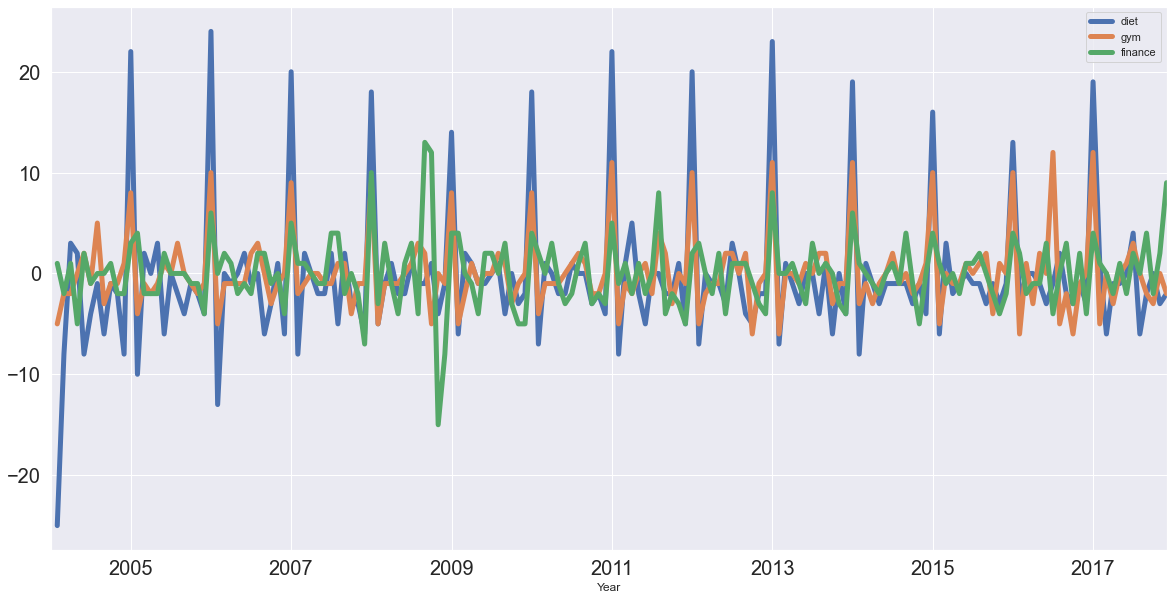

In [27]:
assert np.all((diet.diff() == diet - diet.shift())[1:])
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')

             diet       gym   finance
diet     1.000000 -0.100764 -0.034639
gym     -0.100764  1.000000 -0.284279
finance -0.034639 -0.284279  1.000000


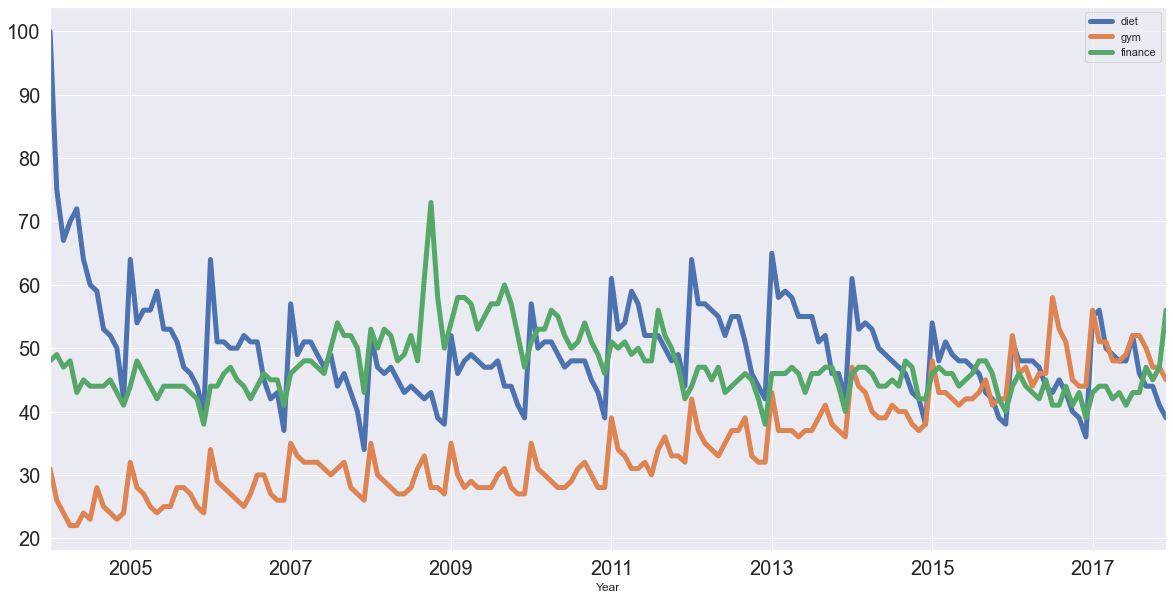

In [30]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')
print(df.corr())

<AxesSubplot:>

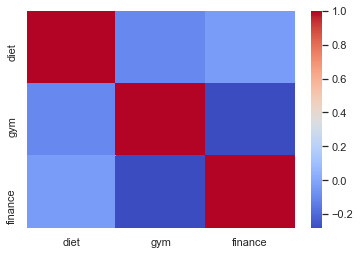

In [31]:
sns.heatmap(df.corr(), cmap='coolwarm')

             diet       gym   finance
diet     1.000000  0.758707  0.373828
gym      0.758707  1.000000  0.301111
finance  0.373828  0.301111  1.000000


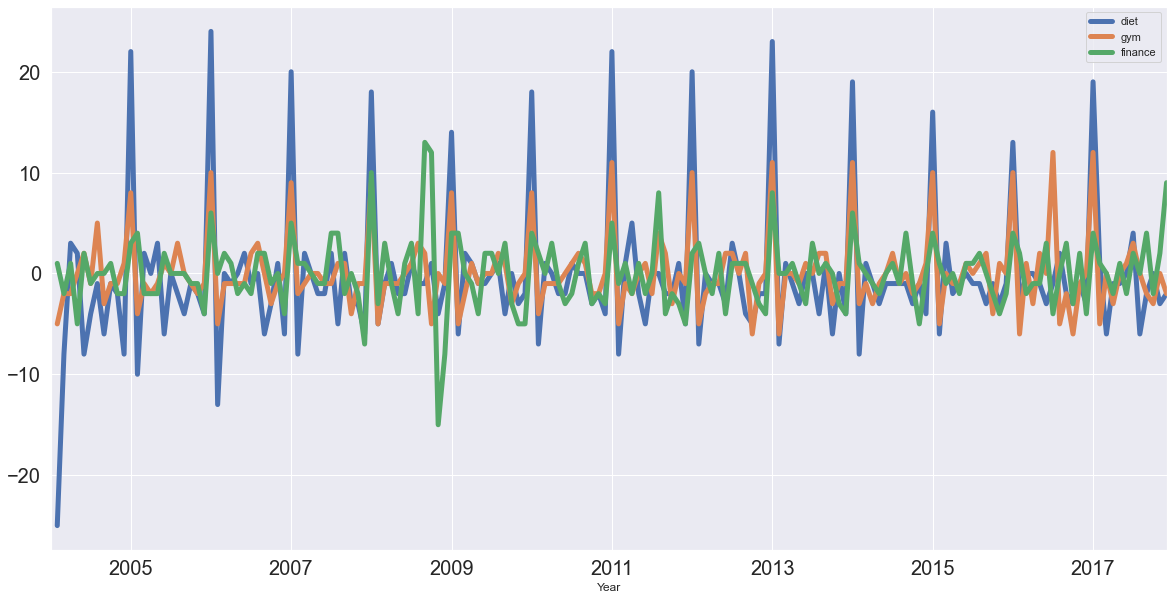

In [33]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')
print(df.diff().corr())

<AxesSubplot:>

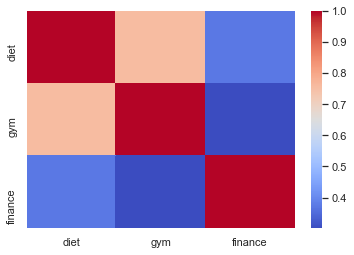

In [34]:
sns.heatmap(df.diff().corr(), cmap='coolwarm')

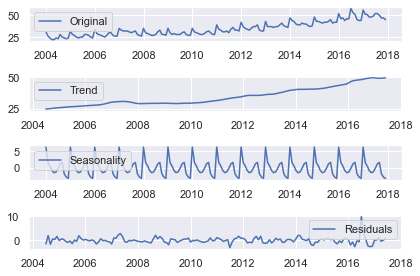

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

x = gym

x = x.astype(float) # force float
decomposition = seasonal_decompose(x)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

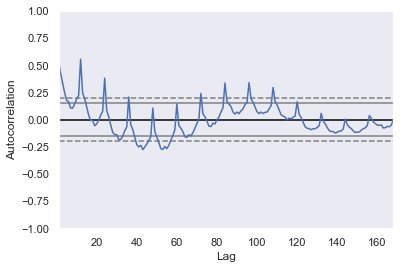

In [40]:
from pandas.plotting import autocorrelation_plot

x = df["diet"].astype(float)
autocorrelation_plot(x)

C:\Users\offic\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


Text(0.5, 1.0, 'Autocorrelation Function')

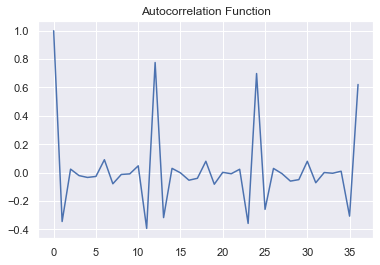

In [41]:
from statsmodels.tsa.stattools import acf

x_diff = x.diff().dropna() # first item is NA
lag_acf = acf(x_diff, nlags=36)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')

C:\Users\offic\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


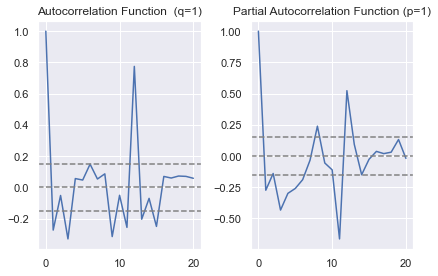

In [42]:
from statsmodels.tsa.stattools import acf, pacf

x = df["gym"].astype(float)

x_diff = x.diff().dropna() # first item is NA
# ACF and PACF plots:

lag_acf = acf(x_diff, nlags=20)
lag_pacf = pacf(x_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function  (q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (p=1)')
plt.tight_layout()

C:\Users\offic\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\offic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                              ARMA Model Results                              
Dep. Variable:                    gym   No. Observations:                  168
Model:                     ARMA(1, 1)   Log Likelihood                -436.852
Method:                       css-mle   S.D. of innovations              3.229
Date:                Thu, 03 Dec 2020   AIC                            881.704
Time:                        23:17:58   BIC                            894.200
Sample:                    01-01-2004   HQIC                           886.776
                         - 12-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4317      8.827      4.127      0.000      19.131      53.732
ar.L1.gym      0.9967      0.005    220.566      0.000       0.988       1.006
ma.L1.gym     -0.7494      0.054    -13.931      0.0

Text(0.5, 1.0, 'RSS: 1794.4666')

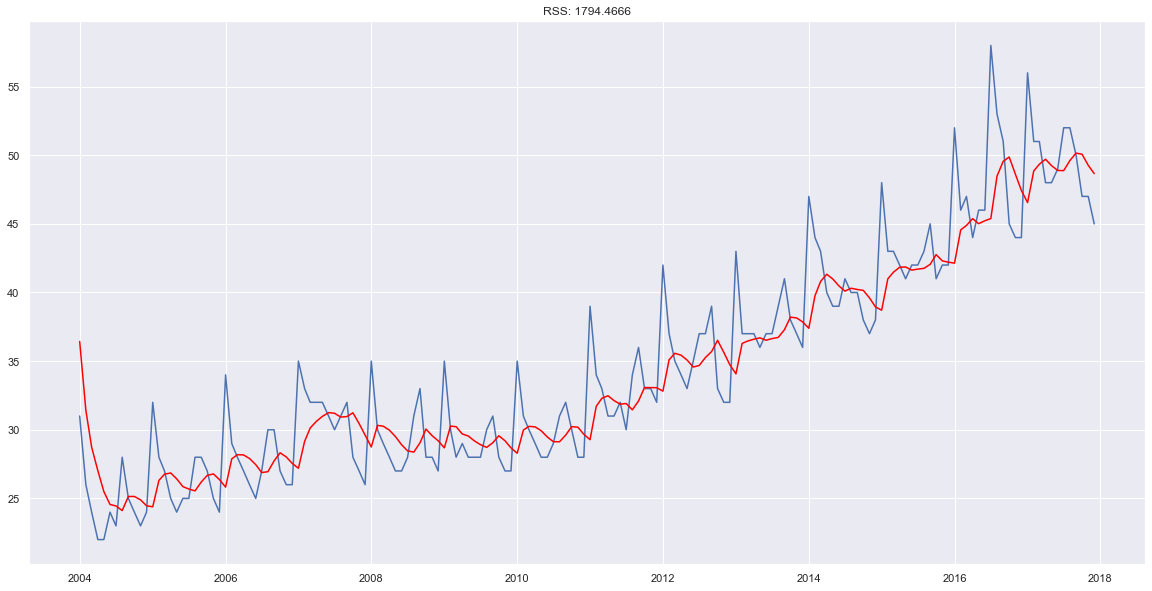

In [44]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(x, order=(1, 1)).fit() # fit model

print(model.summary())
plt.figure(figsize=(20,10))
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2))